In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Gliserin

## Faktor g

      f    V     I     B (T)      f (Hz)
0  18.5  8.1  3.40  0.390402  18500000.0
1  18.7  8.3  3.46  0.399838  18700000.0
2  18.9  8.4  3.49  0.404555  18900000.0
3  19.1  8.6  3.56  0.413991  19100000.0
4  19.3  8.7  3.53  0.418708  19300000.0
Persamaan:
y = 27890486.331988752 x + 7590442.93439132
Kesalahan: 
delta m = 1859365.7554659485


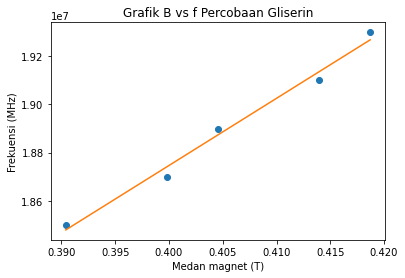

In [2]:
df_gliserin = pd.read_csv("Gliserin.txt", sep='\t')
df_gliserin_factg = df_gliserin[['f','V','I']].copy()
df_gliserin_factg['B (T)'] = (47.177*df_gliserin_factg.loc[:,'V']+8.2684 )*1e-3
df_gliserin_factg['f (Hz)'] = df_gliserin_factg['f']*1e6
print(df_gliserin_factg)
y_gliserin_factg = df_gliserin_factg['f (Hz)']
x_gliserin_factg = df_gliserin_factg['B (T)']

x_const_gliserin_factg = sm.add_constant(x_gliserin_factg)
hasil_gliserin_factg = sm.OLS(y_gliserin_factg, x_const_gliserin_factg).fit()

const_gliserin_factg = hasil_gliserin_factg.params[0]
grad_gliserin_factg = hasil_gliserin_factg.params[1]
print(f"Persamaan:\ny = {grad_gliserin_factg} x + {const_gliserin_factg}")

grad_err_gliserin_factg = hasil_gliserin_factg.bse[1]
print("Kesalahan: \ndelta m =", grad_err_gliserin_factg)

y_predict_gliserin_factg = grad_gliserin_factg*x_gliserin_factg + const_gliserin_factg
plt.plot(x_gliserin_factg, y_gliserin_factg,'o', x_gliserin_factg, y_predict_gliserin_factg)
plt.title("Grafik B vs f Percobaan Gliserin")
plt.xlabel("Medan magnet (T)")
plt.ylabel("Frekuensi (MHz)")
plt.show()

In [3]:
h = 6.6261*1e-34
mu_0 = 5.0508*1e-27
g_fact_gliserin = (h*grad_gliserin_factg)/mu_0
print(f"Faktor g: {g_fact_gliserin}")

g_fact_err_gliserin = (h*grad_err_gliserin_factg)/mu_0
print(f"delta Faktor g: {g_fact_err_gliserin}")

Faktor g: 3.6589283179771654
delta Faktor g: 0.24392855453181517


In [4]:
print(hasil_gliserin_factg.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                 f (Hz)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     225.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           0.000643
Time:                        15:42:47   Log-Likelihood:                -59.031
No. Observations:                   5   AIC:                             122.1
Df Residuals:                       3   BIC:                             121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.59e+06   7.54e+05     10.064      0.0

## Kesalahan

In [5]:
err_relative_g_fact_gliserin = abs(g_fact_err_gliserin/g_fact_gliserin)*100
print(f"Kesalahan relatif: {err_relative_g_fact_gliserin}%")
g_fact_lit_gliserin = 5.587
err_abs_g_fact_gliserin = abs((g_fact_lit_gliserin-g_fact_gliserin)/g_fact_lit_gliserin)*100
print(f"Kesalahan literatur: {err_abs_g_fact_gliserin}%")

Kesalahan relatif: 6.666666666666781%
Kesalahan literatur: 34.50996388084543%


## Waktu Relaksasi

In [6]:
df_gliserin_relax_time = df_gliserin.iloc[1:2,3:5].rename(columns=df_gliserin.iloc[0]).copy()
gliserin_relax_time = 1/(float(df_gliserin_relax_time['Vkanan']) - float(df_gliserin_relax_time['Vkiri']))
print('Waktu Relaksasi: T =',gliserin_relax_time,'s')

Waktu Relaksasi: T = 0.24673690443879695 s


# Polystyrene

## Faktor g

       f     V     I     B (T)      f (Hz)
0  18.50   9.1  3.70  0.437579  18500000.0
1  18.70   9.4  3.80  0.451732  18700000.0
2  18.90   9.6  3.89  0.461168  18900000.0
3  19.10   9.8  3.98  0.470603  19100000.0
4  19.28  10.0  4.03  0.480038  19280000.0
Persamaan:
y = 18746979.02597046 x + 10268189.199933022
Kesalahan: 
delta m = 893557.8757378216


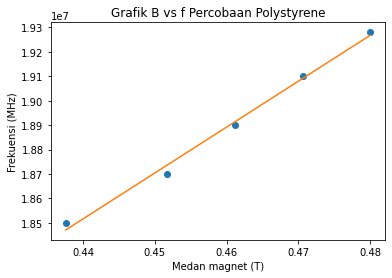

In [7]:
df_polystyrene = pd.read_csv("Polystyrene.txt", sep='\t')
df_polystyrene_factg = df_polystyrene[['f','V','I']].copy()
df_polystyrene_factg['B (T)'] = (47.177*df_polystyrene_factg.loc[:,'V']+8.2684 )*1e-3
df_polystyrene_factg['f (Hz)'] = df_polystyrene_factg['f']*1e6
print(df_polystyrene_factg)
y_polystyrene_factg = df_polystyrene_factg['f (Hz)']
x_polystyrene_factg = df_polystyrene_factg['B (T)']

x_const_polystyrene_factg = sm.add_constant(x_polystyrene_factg)
hasil_polystyrene_factg = sm.OLS(y_polystyrene_factg, x_const_polystyrene_factg).fit()

const_polystyrene_factg = hasil_polystyrene_factg.params[0]
grad_polystyrene_factg = hasil_polystyrene_factg.params[1]
print(f"Persamaan:\ny = {grad_polystyrene_factg} x + {const_polystyrene_factg}")

grad_err_polystyrene_factg = hasil_polystyrene_factg.bse[1]
print("Kesalahan: \ndelta m =", grad_err_polystyrene_factg)

y_predict_polystyrene_factg = grad_polystyrene_factg*x_polystyrene_factg + const_polystyrene_factg
plt.plot(x_polystyrene_factg, y_polystyrene_factg,'o', x_polystyrene_factg, y_predict_polystyrene_factg)
plt.title("Grafik B vs f Percobaan Polystyrene")
plt.xlabel("Medan magnet (T)")
plt.ylabel("Frekuensi (MHz)")
plt.show()

In [8]:
h = 6.6261*1e-34
mu_0 = 5.0508*1e-27
g_fact_polystyrene = (h*grad_polystyrene_factg)/mu_0
print(f"Faktor g: {g_fact_polystyrene}")

g_fact_err_polystyrene = (h*grad_err_polystyrene_factg)/mu_0
print(f"delta Faktor g: {g_fact_err_polystyrene}")

Faktor g: 2.4593996539950673
delta Faktor g: 0.11722507009634868


In [9]:
print(hasil_polystyrene_factg.summary())

                            OLS Regression Results                            
Dep. Variable:                 f (Hz)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     440.2
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           0.000237
Time:                        15:42:48   Log-Likelihood:                -57.270
No. Observations:                   5   AIC:                             118.5
Df Residuals:                       3   BIC:                             117.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.027e+07   4.11e+05     24.956      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Kesalahan

In [10]:
err_relative_g_fact_polystyrene = abs(g_fact_err_polystyrene/g_fact_polystyrene)*100
print(f"Kesalahan relatif: {err_relative_g_fact_polystyrene}%")
g_fact_lit_polystyrene = 5.587
err_abs_g_fact_polystyrene = abs((g_fact_lit_polystyrene-g_fact_polystyrene)/g_fact_lit_polystyrene)*100
print(f"Kesalahan literatur: {err_abs_g_fact_polystyrene}%")

Kesalahan relatif: 4.766409961306102%
Kesalahan literatur: 55.97995965643337%


## Waktu Relaksasi

In [11]:
df_polystyrene_relax_time = df_polystyrene.iloc[1:2,3:5].rename(columns=df_polystyrene.iloc[0]).copy()
polystyrene_relax_time = 1/(float(df_polystyrene_relax_time['Vkanan']) - float(df_polystyrene_relax_time['Vkiri']))
print('Waktu Relaksasi: T =',polystyrene_relax_time,'s')

Waktu Relaksasi: T = 7.047216349541946 s


# Teflon

## Faktor g

       f    V     I     B (T)
0  18.50  8.5  3.39  0.409273
1  18.70  8.6  3.44  0.413991
2  18.90  8.7  3.50  0.418708
3  19.10  8.9  3.55  0.428144
4  19.26  9.0  3.59  0.432861
Persamaan:
y = 30759963.34437728 x + 5954501.528385639
Kesalahan: 
delta m = 2481117.847062493


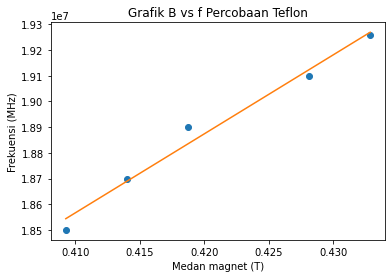

In [12]:
df_teflon = pd.read_csv("Teflon.txt", sep='\t')
df_teflon_factg = df_teflon[['f','V','I']].copy()
df_teflon_factg['B (T)'] = (47.177*df_teflon_factg.loc[:,'V']+8.2684 )*1e-3
print(df_teflon_factg)
df_teflon_factg['f (Hz)'] = df_teflon_factg['f']*1e6
y_teflon_factg = df_teflon_factg['f (Hz)']
x_teflon_factg = df_teflon_factg['B (T)']

x_const_teflon_factg = sm.add_constant(x_teflon_factg)
hasil_teflon_factg = sm.OLS(y_teflon_factg, x_const_teflon_factg).fit()

const_teflon_factg = hasil_teflon_factg.params[0]
grad_teflon_factg = hasil_teflon_factg.params[1]
print(f"Persamaan:\ny = {grad_teflon_factg} x + {const_teflon_factg}")

grad_err_teflon_factg = hasil_teflon_factg.bse[1]
print("Kesalahan: \ndelta m =", grad_err_teflon_factg)

y_predict_teflon_factg = grad_teflon_factg*x_teflon_factg + const_teflon_factg
plt.plot(x_teflon_factg, y_teflon_factg,'o', x_teflon_factg, y_predict_teflon_factg)
plt.title("Grafik B vs f Percobaan Teflon")
plt.xlabel("Medan magnet (T)")
plt.ylabel("Frekuensi (MHz)")
plt.show()

In [13]:
h = 6.6261*1e-34
mu_0 = 5.0508*1e-27
g_fact_teflon = (h*grad_teflon_factg)/mu_0
print(f"Faktor g: {g_fact_teflon}")

g_fact_err_teflon = (h*grad_err_teflon_factg)/mu_0
print(f"delta Faktor g: {g_fact_err_teflon}")

Faktor g: 4.035372477947618
delta Faktor g: 0.3254956633883897


In [14]:
print(hasil_teflon_factg.summary())

                            OLS Regression Results                            
Dep. Variable:                 f (Hz)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     153.7
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00113
Time:                        15:42:49   Log-Likelihood:                -59.769
No. Observations:                   5   AIC:                             123.5
Df Residuals:                       3   BIC:                             122.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.955e+06   1.04e+06      5.705      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Kesalahan

In [15]:
err_relative_g_fact_teflon = abs(g_fact_err_teflon/g_fact_teflon)*100
print(f"Kesalahan relatif: {err_relative_g_fact_teflon}%")
g_fact_lit_teflon = 5.2567
err_abs_g_fact_teflon = abs((g_fact_lit_teflon-g_fact_teflon)/g_fact_lit_teflon)*100
print(f"Kesalahan literatur: {err_abs_g_fact_teflon}%")

Kesalahan relatif: 8.06606243084495%
Kesalahan literatur: 23.233730706572224%


## Waktu Relaksasi

In [16]:
df_teflon_relax_time = df_teflon.iloc[1:2,3:5].rename(columns=df_teflon.iloc[0]).copy()
teflon_relax_time = 1/(float(df_teflon_relax_time['Vkanan']) - float(df_teflon_relax_time['Vkiri']))
print('Waktu Relaksasi: T =',teflon_relax_time,'s')

Waktu Relaksasi: T = 32.154340836014335 s
